# Laboratorio 3 - Variables aleatorias

**Instrucciones**: Escriba programas en Python para resolver los ejercicios.

## Ejercicio 1. 

Una caja contiene 5 pelotas blancas y 3 rojas. Suponga que se extraen 2 pelotas al azar sin reemplazo y $X$ denota el número de pelotas blancas. 

a. Determine $p(x)$ la función de masa de probabilidad de $X$.

b. Determine $F(x)$ la función de distribución acumulada de $X$.

c. Trace las representaciones gráficas de $p(x)$ y $F(x)$.

d. Encuentre $E[x]$ y $Var(x)$.

a. Función de masa de probabilidad (PMF):
P(X = 0) = 0.1071
P(X = 1) = 0.5357
P(X = 2) = 0.3571

b. Función de distribución acumulada (CDF):
F(0) = 0.1071
F(1) = 0.6429
F(2) = 1.0000

d. Esperanza y Varianza:
E[X] = 1.2500
Var(X) = 0.4018

Verificación con scipy.stats.hypergeom:
E[X] = 1.2500
Var(X) = 0.4018


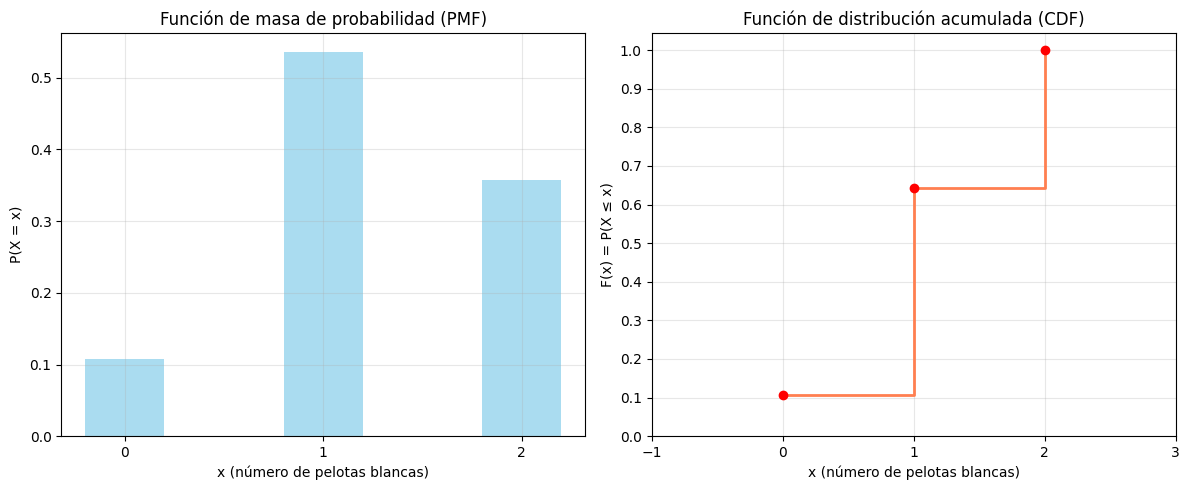

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import hypergeom
import sympy as sy

# Datos del problema
n_blancas = 5    # Número de pelotas blancas
n_rojas = 3      # Número de pelotas rojas
total = n_blancas + n_rojas  # Total de pelotas
n_extracciones = 2  # Número de pelotas extraídas

# a. Función de masa de probabilidad (PMF)
# Usamos la distribución hipergeométrica
# X ~ Hypergeom(N=8, K=5, n=2)
# donde N=total, K=blancas, n=extracciones

# Valores posibles de X (0, 1, 2 pelotas blancas)
x_values = np.arange(0, min(n_extracciones, n_blancas) + 1)

# Calculamos la PMF manualmente
def pmf_manual(x):
    # Calculamos PMF como: P(X=x) = C(K,x) * C(N-K,n-x) / C(N,n)
    # donde C(n,k) es combinatoria n sobre k
    comb_blancas = np.math.comb(n_blancas, x)
    comb_rojas = np.math.comb(n_rojas, n_extracciones - x)
    comb_total = np.math.comb(total, n_extracciones)
    return comb_blancas * comb_rojas / comb_total

# Calculamos la PMF para cada valor posible de x
pmf_values = [pmf_manual(x) for x in x_values]

print("a. Función de masa de probabilidad (PMF):")
for x, p in zip(x_values, pmf_values):
    print(f"P(X = {x}) = {p:.4f}")

# b. Función de distribución acumulada (CDF)
cdf_values = np.cumsum(pmf_values)

print("\nb. Función de distribución acumulada (CDF):")
for x, F in zip(x_values, cdf_values):
    print(f"F({x}) = {F:.4f}")

# c. Representaciones gráficas de p(x) y F(x)
plt.figure(figsize=(12, 5))

# Gráfica de la PMF
plt.subplot(1, 2, 1)
plt.bar(x_values, pmf_values, width=0.4, alpha=0.7, color='skyblue')
plt.title('Función de masa de probabilidad (PMF)')
plt.xlabel('x (número de pelotas blancas)')
plt.ylabel('P(X = x)')
plt.xticks(x_values)
plt.grid(alpha=0.3)

# Gráfica de la CDF
plt.subplot(1, 2, 2)
plt.step(x_values, cdf_values, where='post', color='coral', linewidth=2)
plt.scatter(x_values, cdf_values, color='red', zorder=5)
plt.title('Función de distribución acumulada (CDF)')
plt.xlabel('x (número de pelotas blancas)')
plt.ylabel('F(x) = P(X ≤ x)')
plt.xticks(np.arange(-1, max(x_values) + 2, 1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(alpha=0.3)
plt.tight_layout()

# d. Esperanza y Varianza
# Esperanza: E[X] = Σ x·p(x)
esperanza = sum(x * p for x, p in zip(x_values, pmf_values))

# Varianza: Var(X) = E[X²] - (E[X])²
esp_cuadrado = sum(x**2 * p for x, p in zip(x_values, pmf_values))
varianza = esp_cuadrado - esperanza**2

print("\nd. Esperanza y Varianza:")
print(f"E[X] = {esperanza:.4f}")
print(f"Var(X) = {varianza:.4f}")

# Verificación con scipy
rv = hypergeom(M=total, n=n_blancas, N=n_extracciones)
print("\nVerificación con scipy.stats.hypergeom:")
print(f"E[X] = {rv.mean():.4f}")
print(f"Var(X) = {rv.var():.4f}")

plt.show()

## Ejercicio 2.

Repita el Ejercicio 1 suponiendo que las pelotas se extraen con reemplazo.

## Ejercicio 3.

Sea $X$ una variable aleatoria que da el número de ases en una extracción al azar de 4 cartas de una baraja ordinaria de 52 cartas.

a. Determine $p(x)$ la función de masa de probabilidad de $X$.

b. Determine $F(x)$ la función de distribución acumulada de $X$.

c. Trace las representaciones gráficas de $p(x)$ y $F(x)$.

d. Encuentre $E[X]$ y $Var(X)$.

d. Calcule las probabilidades de $P(\{X\geq 2\})$ y $P(\{1\leq X\leq 3\})$.

a. Función de masa de probabilidad (PMF):
P(X = 0) = 0.718737
P(X = 1) = 0.255551
P(X = 2) = 0.025000
P(X = 3) = 0.000709
P(X = 4) = 0.000004

b. Función de distribución acumulada (CDF):
F(0) = 0.718737
F(1) = 0.974288
F(2) = 0.999287
F(3) = 0.999996
F(4) = 1.000000

d. Esperanza y Varianza:
E[X] = 0.307692
Var(X) = 0.267316

e. Probabilidades específicas:
P(X ≥ 2) = 0.025712
P(1 ≤ X ≤ 3) = 0.281260


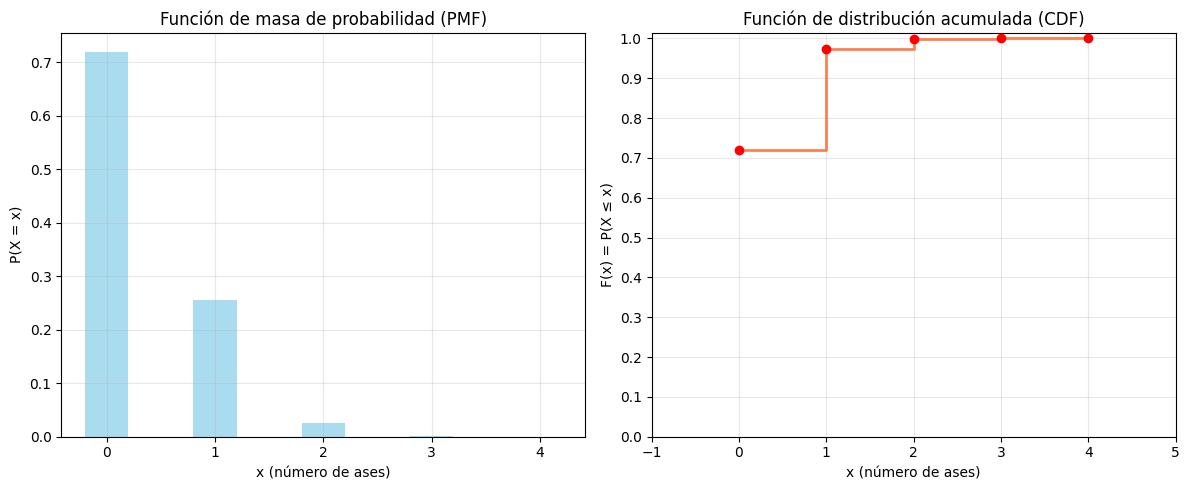

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import hypergeom
import sympy as sy

# Datos del problema
n_ases = 4          # Número de ases en la baraja
n_no_ases = 48      # Número de cartas que no son ases
total = 52          # Total de cartas en la baraja
n_extracciones = 4  # Número de cartas extraídas

# a. Función de masa de probabilidad (PMF)
# N=52, K=4, n=4
# donde N=total, K=ases, n=extracciones

# Valores posibles de X (0, 1, 2, 3, 4 ases)
x_values = np.arange(0, min(n_extracciones, n_ases) + 1)

# Calculamos la PMF manualmente
def pmf_manual(x):
    # Calculamos PMF como: P(X=x) = C(K,x) * C(N-K,n-x) / C(N,n)
    # donde C(n,k) es combinatoria n sobre k
    comb_ases = np.math.comb(n_ases, x)
    comb_no_ases = np.math.comb(n_no_ases, n_extracciones - x)
    comb_total = np.math.comb(total, n_extracciones)
    return comb_ases * comb_no_ases / comb_total

# Calculamos la PMF para cada valor posible de x
pmf_values = [pmf_manual(x) for x in x_values]

print("a. Función de masa de probabilidad (PMF):")
for x, p in zip(x_values, pmf_values):
    print(f"P(X = {x}) = {p:.6f}")

# b. Función de distribución acumulada (CDF)
cdf_values = np.cumsum(pmf_values)

print("\nb. Función de distribución acumulada (CDF):")
for x, F in zip(x_values, cdf_values):
    print(f"F({x}) = {F:.6f}")

# c. Representaciones gráficas de p(x) y F(x)
plt.figure(figsize=(12, 5))

# Gráfica de la PMF
plt.subplot(1, 2, 1)
plt.bar(x_values, pmf_values, width=0.4, alpha=0.7, color='skyblue')
plt.title('Función de masa de probabilidad (PMF)')
plt.xlabel('x (número de ases)')
plt.ylabel('P(X = x)')
plt.xticks(x_values)
plt.grid(alpha=0.3)

# Gráfica de la CDF
plt.subplot(1, 2, 2)
plt.step(x_values, cdf_values, where='post', color='coral', linewidth=2)
plt.scatter(x_values, cdf_values, color='red', zorder=5)
plt.title('Función de distribución acumulada (CDF)')
plt.xlabel('x (número de ases)')
plt.ylabel('F(x) = P(X ≤ x)')
plt.xticks(np.arange(-1, max(x_values) + 2, 1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(alpha=0.3)
plt.tight_layout()

# d. Esperanza y Varianza
# Esperanza: E[X] = Σ x·p(x)
esperanza = sum(x * p for x, p in zip(x_values, pmf_values))

# Varianza: Var(X) = E[X²] - (E[X])²
esp_cuadrado = sum(x**2 * p for x, p in zip(x_values, pmf_values))
varianza = esp_cuadrado - esperanza**2

print("\nd. Esperanza y Varianza:")
print(f"E[X] = {esperanza:.6f}")
print(f"Var(X) = {varianza:.6f}")

# e. Probabilidades específicas
# P(X ≥ 2)
p_x_ge_2 = sum(p for x, p in zip(x_values, pmf_values) if x >= 2)
# P(1 ≤ X ≤ 3)
p_1_le_x_le_3 = sum(p for x, p in zip(x_values, pmf_values) if 1 <= x <= 3)

print("\ne. Probabilidades específicas:")
print(f"P(X ≥ 2) = {p_x_ge_2:.6f}")
print(f"P(1 ≤ X ≤ 3) = {p_1_le_x_le_3:.6f}")


plt.show()

## Ejercicio 4.

Considere la función:
$$f(x)=\left\{\begin{array}{rl}ce^{-3x},& x>0\\ 0,& x\leq 0\end{array}\right.$$

a. Encuentre el valor de $c\in \mathbb{R}$ tal que $f$ sea una función de densidad de probabilidad de una variable aleatoria continua $X$.

b. Determine $F(x)$ la función de distribución acumulada de la variable aleatoria $X$.

c. Trace las representaciones gráficas de $f(x)$ y $F(x)$.

d. Encuentre $E[X]$ y $Var(X)$.

e. Calcule las probabilidades de $P(\{1\leq X\leq 2\})$, $P(X\geq 3)$, $P\left(\{2\leq X\leq 3\}|\{X> 1\}\right)$.


## Ejercicio 5.

Sea $X$ una variable aleatoria continua con función de densidad de probabilidad:
$$f(x)=\left\{\begin{array}{rl}\frac{x}{3},& 0\leq x\leq 2\\ -\frac{2}{3}\left(x-3\right),& 2<x\leq 3\end{array}\right.$$

a. Determine $F(x)$ la función de distribución acumulada de la variable aleatoria $X$.

b. Trace las representaciones gráficas de $f(x)$ y $F(x)$.

c. Encuentre $E[X]$ y $Var(X)$.

d. Determine el valor de $a$ tal que $P(\{X>a\})=\frac{1}{2}$.

Sean $A=\{2\leq X\leq 3\}$ y $B=\{X>1\}$ eventos. 

e. Calcule $P(A|B)$ y $P(B|A)$.

f. ¿Son $A$ y $B$ eventos independientes?

a. Función de Distribución Acumulada (CDF):
Para 0 ≤ x ≤ 2: F(x) = x**2/6
Para 2 < x ≤ 3: F(x) = -0.333333333333333*x**2 + 2.0*x - 2.0

c. Esperanza y Varianza:
E[X] = 1.66666666666667
Var(X) = 0.388888888888890

d. Valor de a tal que P(X>a) = 1/2: a = 1.7320508075688725

e. Probabilidades condicionales:
P(A) = P(2 ≤ X ≤ 3) = 0.33333333333333337
P(B) = P(X > 1) = 0.8333333333333334
P(A∩B) = P(2 ≤ X ≤ 3) = 0.33333333333333337
P(A|B) = 0.4
P(B|A) = 1.0

f. ¿Son A y B eventos independientes?
P(A)·P(B) = 0.27777777777777785
P(A∩B) = 0.33333333333333337
Los eventos son independientes.


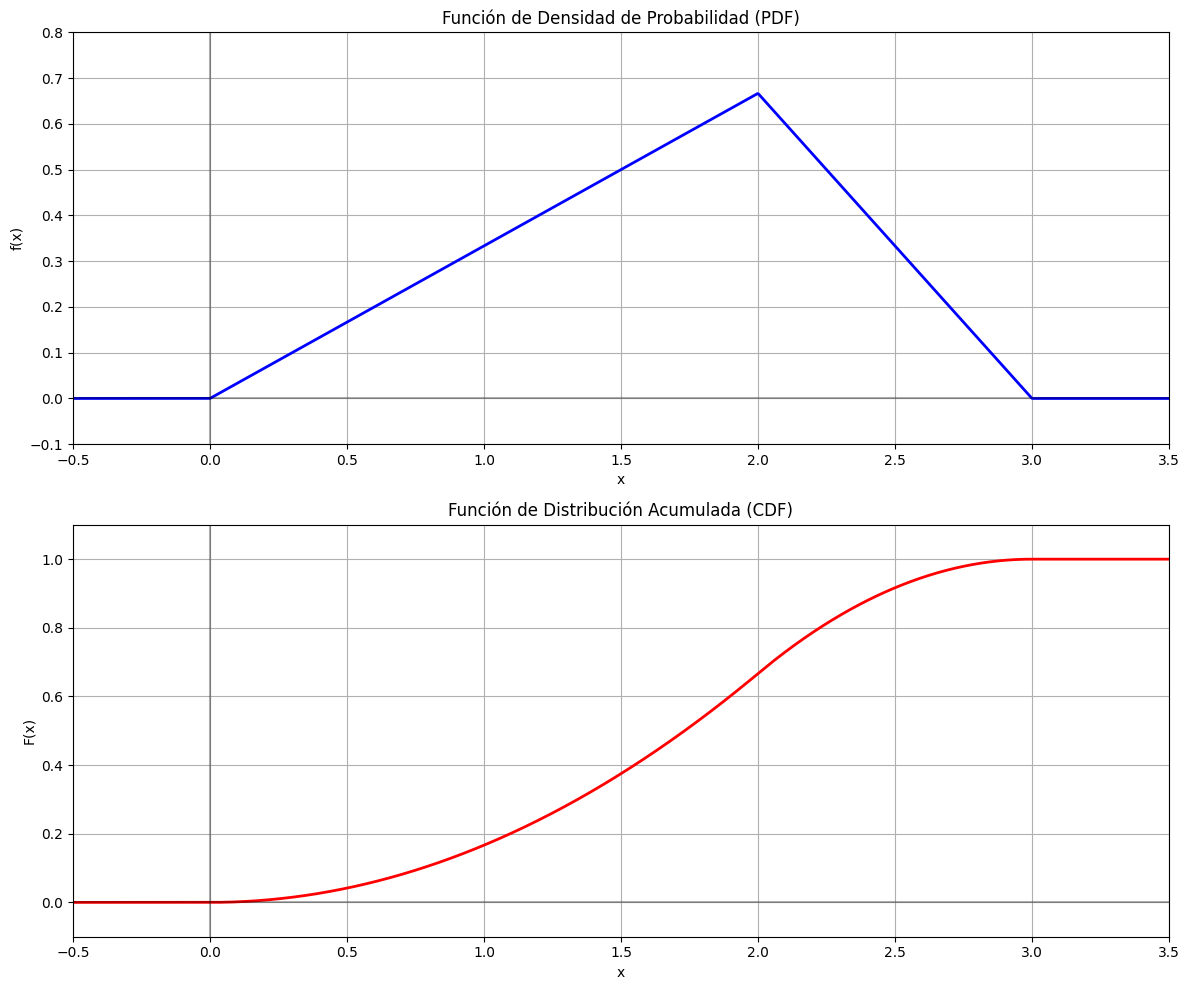

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
from scipy import integrate

# Definición de la función de densidad de probabilidad (PDF)
def pdf(x):
    if 0 <= x <= 2:
        return x/3
    elif 2 < x <= 3:
        return -(2/3)*(x-3)
    else:
        return 0

# a. Función de distribución acumulada (CDF)
def cdf(x):
    if x < 0:
        return 0
    elif 0 <= x <= 2:
        return (x**2)/6
    elif 2 < x <= 3:
        # Para x en [2,3], la CDF es F(2) + integral de f(t) desde 2 hasta x
        return (2**2)/6 + integrate.quad(lambda t: -(2/3)*(t-3), 2, x)[0]
    else:
        return 1

# Cálculo simbólico para verificación
x = sy.symbols('x', real=True)
t = sy.symbols('t', real=True)

# PDF simbólica
def pdf_sym(x):
    return sy.Piecewise((x/3, (0 <= x) & (x <= 2)), 
                       (-(2/3)*(x-3), (2 < x) & (x <= 3)), 
                       (0, True))

# CDF simbólica
def cdf_sym(x):
    return sy.Piecewise((0, x < 0),
                        (sy.integrate(pdf_sym(t), (t, 0, x)), (0 <= x) & (x <= 2)),
                        (sy.integrate(pdf_sym(t), (t, 0, 2)) + sy.integrate(pdf_sym(t), (t, 2, x)), (2 < x) & (x <= 3)),
                        (1, x > 3))

# Calculamos la CDF simbólica para cada caso
cdf_sym_case1 = sy.integrate(t/3, (t, 0, x)).simplify()
cdf_sym_case2 = sy.integrate(t/3, (t, 0, 2)).simplify() + sy.integrate(-(2/3)*(t-3), (t, 2, x)).simplify()

print("a. Función de Distribución Acumulada (CDF):")
print(f"Para 0 ≤ x ≤ 2: F(x) = {cdf_sym_case1}")
print(f"Para 2 < x ≤ 3: F(x) = {cdf_sym_case2}")

# b. Representaciones gráficas de f(x) y F(x)
x_vals = np.linspace(-0.5, 3.5, 1000)
pdf_vals = [pdf(xi) for xi in x_vals]
cdf_vals = [cdf(xi) for xi in x_vals]

plt.figure(figsize=(12, 10))

# Gráfica de la PDF
plt.subplot(2, 1, 1)
plt.plot(x_vals, pdf_vals, 'b-', linewidth=2)
plt.title('Función de Densidad de Probabilidad (PDF)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.xlim(-0.5, 3.5)
plt.ylim(-0.1, 0.8)

# Gráfica de la CDF
plt.subplot(2, 1, 2)
plt.plot(x_vals, cdf_vals, 'r-', linewidth=2)
plt.title('Función de Distribución Acumulada (CDF)')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.xlim(-0.5, 3.5)
plt.ylim(-0.1, 1.1)

plt.tight_layout()

# c. Esperanza y Varianza
# Esperanza: E[X] = ∫x·f(x)dx
def expectation():
    E1 = integrate.quad(lambda x: x * (x/3), 0, 2)[0]
    E2 = integrate.quad(lambda x: x * (-(2/3)*(x-3)), 2, 3)[0]
    return E1 + E2

# Varianza: Var(X) = E[X²] - (E[X])²
def variance():
    EX2_1 = integrate.quad(lambda x: x**2 * (x/3), 0, 2)[0]
    EX2_2 = integrate.quad(lambda x: x**2 * (-(2/3)*(x-3)), 2, 3)[0]
    EX2 = EX2_1 + EX2_2
    EX = expectation()
    return EX2 - EX**2

# Cálculo simbólico
E_X_sym = sy.integrate(t * pdf_sym(t), (t, 0, 3))
E_X2_sym = sy.integrate(t**2 * pdf_sym(t), (t, 0, 3))
Var_X_sym = E_X2_sym - E_X_sym**2

print("\nc. Esperanza y Varianza:")
print(f"E[X] = {E_X_sym.evalf()}")
print(f"Var(X) = {Var_X_sym.evalf()}")

# d. Valor de a tal que P(X>a) = 1/2
# Esto significa que necesitamos encontrar a tal que F(a) = 0.5
def find_a():
    from scipy.optimize import fsolve
    return fsolve(lambda a: cdf(a) - 0.5, 1.5)[0]

a_value = find_a()
print(f"\nd. Valor de a tal que P(X>a) = 1/2: a = {a_value}")

# e. Probabilidades condicionales
# A = {2 ≤ X ≤ 3} y B = {X > 1}
P_A = cdf(3) - cdf(2)
P_B = 1 - cdf(1)
P_A_intersection_B = P_A  # Ya que A ⊂ B

P_A_given_B = P_A_intersection_B / P_B
P_B_given_A = P_A_intersection_B / P_A  # Debería ser 1 ya que A ⊂ B

print("\ne. Probabilidades condicionales:")
print(f"P(A) = P(2 ≤ X ≤ 3) = {P_A}")
print(f"P(B) = P(X > 1) = {P_B}")
print(f"P(A∩B) = P(2 ≤ X ≤ 3) = {P_A_intersection_B}")
print(f"P(A|B) = {P_A_given_B}")
print(f"P(B|A) = {P_B_given_A}")

# f. Independencia
independent = abs(P_A * P_B - P_A_intersection_B)
print("\nf. ¿Son A y B eventos independientes?")
print(f"P(A)·P(B) = {P_A * P_B}")
print(f"P(A∩B) = {P_A_intersection_B}")
print(f"Los eventos {'son' if independent else 'no son'} independientes.")

plt.show()

## Ejercicio 6.
Sea $X$ una variable aleatoria continua que representa el tiempo (en minutos) entre llegadas de clientes a un banco. Si la función de densidad de probabilidad de $X$ es:

$$f(x)=\left\{\begin{array}{rl}\frac{2}{3}e^{-2x/3},& x\geq 0\\ 0,& \text{caso contrario}\end{array}\right.$$
					
a. ¿Qué es más probable? Que llegue un cliente en los próximos 30 segundos, o que no llegue ningún cliente en los próximos 2 minutos.

b. ¿Cuál es la probabilidad de que no llegue ningún cliente en el minuto siguiente, dado que no ha llegado ningún cliente en el último minuto?

c. Calcule $E[X]$ y $Var(X)$.